In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from os import getcwd


pd.set_option('notebook_repr_html', True, 'max_columns', 0)
%matplotlib inline

In [2]:
path=r'C:\Users\roni.shashua\Desktop\payton\project 2'
#path_tal = r'C:\Users\Tal\Desktop\DS-Python\python_project2'
df_data = pd.read_csv(path + "\\train.csv")
#df_data = pd.read_csv(path_tal + "\\train.csv")
df_data['DateTime'] = pd.to_datetime(df_data['DateTime'])
df_data.set_index('DateTime', inplace=True)
df_data.head()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
DateTime,,,,,,,,,
2014-02-12 18:22:00,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
2013-10-13 12:44:00,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2015-01-31 12:28:00,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
2014-07-11 19:09:00,A683430,NaN,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
2013-11-15 12:52:00,A667013,NaN,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26729 entries, 2014-02-12 18:22:00 to 2015-07-02 09:00:00
Data columns (total 9 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


In [4]:
df_data.describe()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,5,16,2,5,44,1380,366
top,A712995,Max,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,10769,7816,15595,9779,3969,8810,2824


Finding AnimalType distribution

In [5]:
df_data['AnimalType'].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

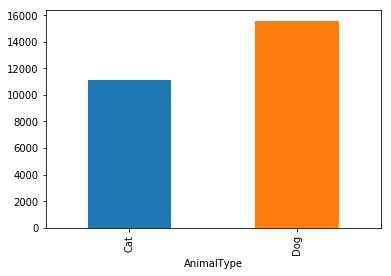

In [6]:
df_data.groupby('AnimalType')['AnimalID'].count().plot(kind='bar')

מסקנה - כמות הכלבים באוכלוסיה גדול מכמות החתולים

Finding SexuponOutcome distribution

                 AnimalID
SexuponOutcome           
Intact Female   13.136037
Intact Male     13.188417
Neutered Male   36.587100
Spayed Female   32.999102
Unknown          4.089345


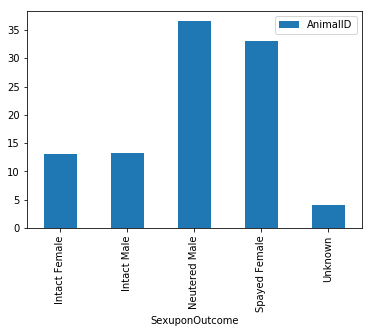

In [7]:
df_SexuponOutcome=df_data.groupby('SexuponOutcome').agg({'AnimalID': 'count'})
SexuponOutcome_total = df_SexuponOutcome.agg({'AnimalID': 'sum'})
df_SexuponOutcome=(df_SexuponOutcome.div(SexuponOutcome_total, level='SexuponOutcome_total') * 100)
print(df_SexuponOutcome)
df_SexuponOutcome.plot(kind='bar')

מסקנה- כמות הכלבים/חתולים המעוקרים גבוהה מהיתר

Finding SexuponOutcome distribution by AnimalType

In [8]:
df_data.groupby(['SexuponOutcome','AnimalType'])['AnimalType'].count().unstack()

AnimalType,Cat,Dog
SexuponOutcome,,
Intact Female,2114,1397
Intact Male,1927,1598
Neutered Male,3065,6714
Spayed Female,3012,5808
Unknown,1016,77


מסקנה- כמות הכלבים/חתולים המעוקרים גבוהה מהיתר אין שוני בין סוגי החיות

Finding SexuponOutcome distribution by AnimalType - count

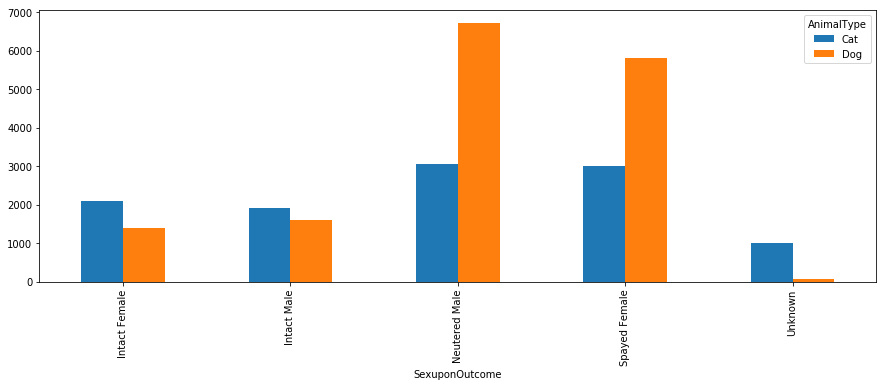

In [9]:
df_data.groupby(['SexuponOutcome','AnimalType'])['AnimalType'].count().unstack().plot(kind='bar',figsize=(15, 5))

Finding SexuponOutcome distribution by AnimalType - Percent from total

In [10]:
df_SexuponOutcome = df_data.groupby(['SexuponOutcome','AnimalType'])['AnimalType'].count().unstack()
SexuponOutcome_total = df_SexuponOutcome.agg({'Dog': 'sum','Cat': 'sum'})
#print(SexuponOutcome_total)
df_SexuponOutcome['Dog']=(df_SexuponOutcome['Dog'].div(SexuponOutcome_total['Dog'] ) * 100)
df_SexuponOutcome['Cat']=(df_SexuponOutcome['Cat'].div(SexuponOutcome_total['Cat'] ) * 100)
print(df_SexuponOutcome)

AnimalType            Cat        Dog
SexuponOutcome                      
Intact Female   18.986887   8.958574
Intact Male     17.307347  10.247531
Neutered Male   27.528292  43.055021
Spayed Female   27.052272  37.245094
Unknown          9.125202   0.493780


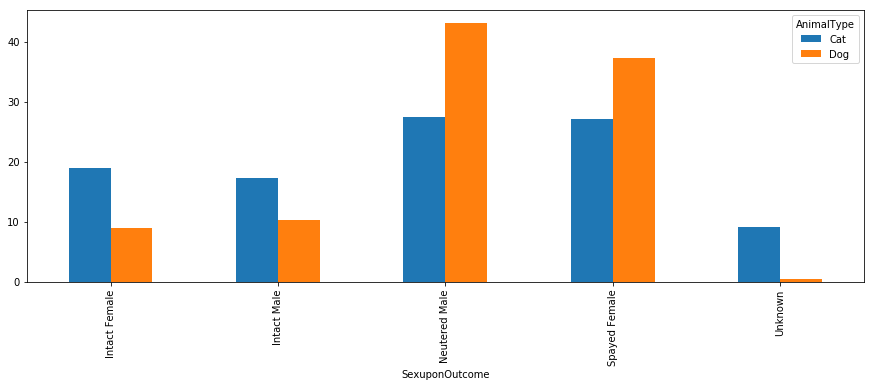

In [11]:
df_SexuponOutcome.plot(kind='bar',figsize=(15, 5))

מסקנה- אחוז הכלבים המעוקרים גבוהה יותר מאשר אצל החתולים

Finding Animal age distribution

In [12]:
def agetodays(x):
        try:
            y = x.split()
        except:
            return None 
        if 'year' in y[1]:
            return float(y[0]) * 365
        elif 'month' in y[1]:
            return float(y[0]) * (365/12)
        elif 'week' in y[1]:
            return float(y[0]) * 7
        elif 'day' in y[1]:
            return float(y[0])

In [13]:
df_data['age']=df_data['AgeuponOutcome'].apply(agetodays, 'AgeuponOutcome')

In [14]:
#df_data.head()

In [15]:
filter_method = lambda x: '1 month' if (x <= 31.0 and x >= 0.0)  else 'month - 6 month' if (x <= 180.0 and x >= 32.0) else '6 month-1 year' if(x <= 365.0 and x >= 181.0) else 'more then 1 year' if(x >= 366.0) else None
df_data['age-range'] = df_data['age'].apply(filter_method)
#df_data.head()

Finding Animal age distribution  - Sum

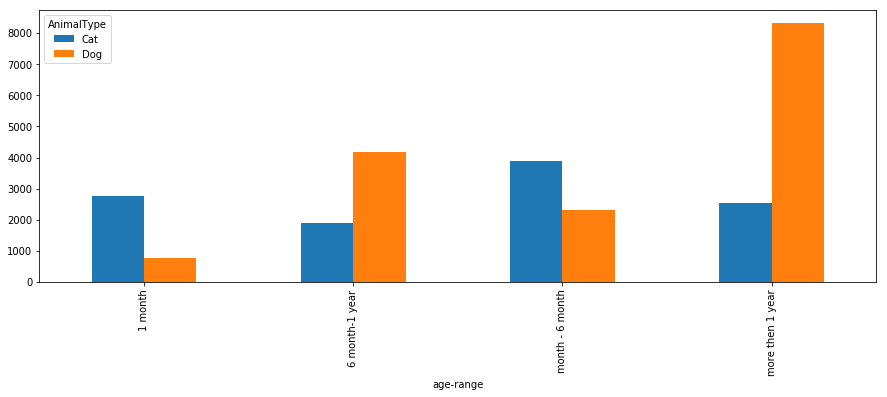

In [16]:
df_age=pd.pivot_table(df_data,
               index='age-range',
               columns='AnimalType', 
               values='AnimalID', 
               aggfunc='count',
               fill_value=0)
df_age.plot(kind='bar',figsize=(15, 5))

מסקנה התפלגות האוכלוסיה- אצל כלבים מעל חצי שנה גבוהה יותר , לעומת חתולים שמתחת לשנה 

Finding Animal age distribution -  Percent from total

In [17]:
df_age=pd.pivot_table(df_data,
               index='age-range',
               columns=['AnimalType','OutcomeType'], 
               values='AnimalID', 
               aggfunc='count',
               margins=True,
               fill_value=0)
df_age

AnimalType            Cat                  ...               Dog             All
OutcomeType      Adoption Died Euthanasia  ...   Return_to_owner Transfer       
age-range                                  ...                                  
1 month               194   90        181  ...                36      446   3540
6 month-1 year        552    9        106  ...               904     1033   6094
month - 6 month      2837   27         81  ...               158      711   6225
more then 1 year      689   21        341  ...              3188     1727  10852
All                  4272  147        709  ...              4286     3917  26711

[5 rows x 11 columns]

In [18]:
#df_age.iloc[-1]

Finding Animal age distribution - Percent from row total

In [19]:
df_percentage = np.round(df_age*100/df_age.iloc[-1], 1)

df_percentage.iloc[:-1,:-1]

AnimalType            Cat         ...                Dog         
OutcomeType      Adoption  Died   ...    Return_to_owner Transfer
age-range                         ...                            
1 month               4.5  61.2   ...                0.8     11.4
6 month-1 year       12.9   6.1   ...               21.1     26.4
month - 6 month      66.4  18.4   ...                3.7     18.2
more then 1 year     16.1  14.3   ...               74.4     44.1

[4 rows x 10 columns]

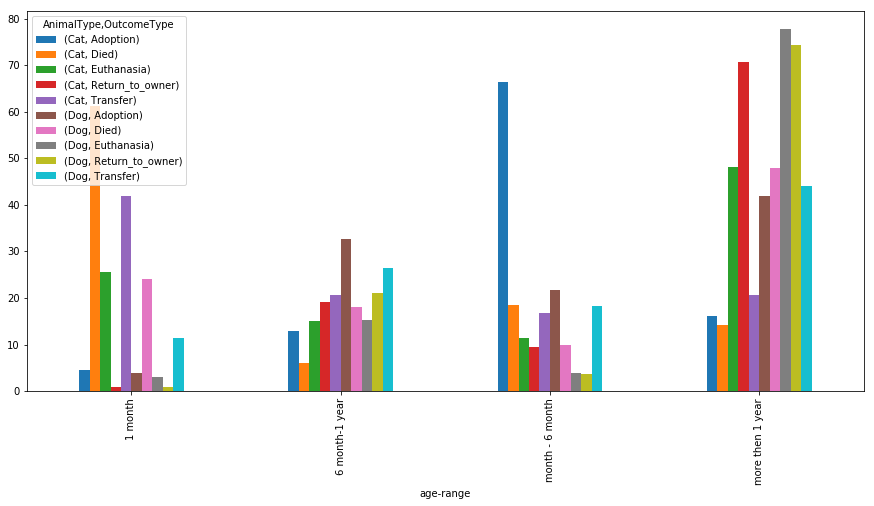

In [20]:
df_percentage.iloc[:-1,:-1].plot(kind='bar',figsize=(15, 7))

מסקנה-
אחוז החתולים בין חודש ל6 חודש שמאומצים גבוהה בצורה ניכרת
,כמות החתולים שמתים עד גיל חודש הוא הגבוהה ביותר


In [21]:
####  ######################################33
####  OutcomeType פונקציה שמחזירה טבלה עם אחוזים לחיזוי נתון ה
####  כתלות בעמודה שאותה בודקים
####  ######################################33
def pivot_return_table(df_data,column):
    grpby_colum = df_data.groupby(['OutcomeType', column]).size().reset_index().rename(columns = {0: 'Count'})
    add_data_grpby_colum = grpby_colum.merge((df_data.groupby([column]).size().reset_index().rename(columns = {0: 'Total'})), how = 'inner', on = column)
    final_table = add_data_grpby_colum.assign(Percent = lambda x: x.Count / x.Total)
    return final_table



In [22]:
AnimalType_OutcomeType_percent = pivot_return_table(df_data,'AnimalType')
print(AnimalType_OutcomeType_percent)


       OutcomeType AnimalType  Count  Total   Percent
0         Adoption        Cat   4272  11134  0.383690
1             Died        Cat    147  11134  0.013203
2       Euthanasia        Cat    710  11134  0.063769
3  Return_to_owner        Cat    500  11134  0.044907
4         Transfer        Cat   5505  11134  0.494431
5         Adoption        Dog   6497  15595  0.416608
6             Died        Dog     50  15595  0.003206
7       Euthanasia        Dog    845  15595  0.054184
8  Return_to_owner        Dog   4286  15595  0.274832
9         Transfer        Dog   3917  15595  0.251170


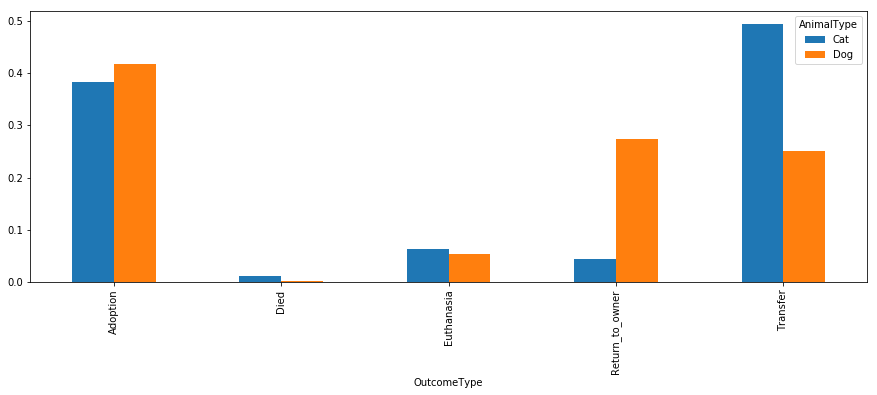

In [23]:
AnimalType_OutcomeType_percent.iloc[:,[0,1,-1]].pivot(index='OutcomeType',columns = 'AnimalType', values='Percent').plot(kind='bar',figsize=(15, 5))

מסקנה - ישנה שונות באחוז החיות שמוחזרים לבעלים אצל הכלבים גבוהה יותר

Finding SexuponOutcome Vs OutcomeType distribution

In [24]:
SexuponOutcome_OutcomeType_percent = pivot_return_table(df_data,'SexuponOutcome')
print(SexuponOutcome_OutcomeType_percent)

        OutcomeType SexuponOutcome  Count  Total   Percent
0          Adoption  Intact Female    203   3511  0.057818
1              Died  Intact Female     56   3511  0.015950
2        Euthanasia  Intact Female    401   3511  0.114212
3   Return_to_owner  Intact Female    301   3511  0.085731
4          Transfer  Intact Female   2550   3511  0.726289
5          Adoption    Intact Male    158   3525  0.044823
6              Died    Intact Male     79   3525  0.022411
7        Euthanasia    Intact Male    477   3525  0.135319
8   Return_to_owner    Intact Male    477   3525  0.135319
9          Transfer    Intact Male   2334   3525  0.662128
10         Adoption  Neutered Male   5222   9779  0.534001
11             Died  Neutered Male     19   9779  0.001943
12       Euthanasia  Neutered Male    344   9779  0.035177
13  Return_to_owner  Neutered Male   2247   9779  0.229778
14         Transfer  Neutered Male   1947   9779  0.199100
15         Adoption  Spayed Female   5186   8820  0.5879

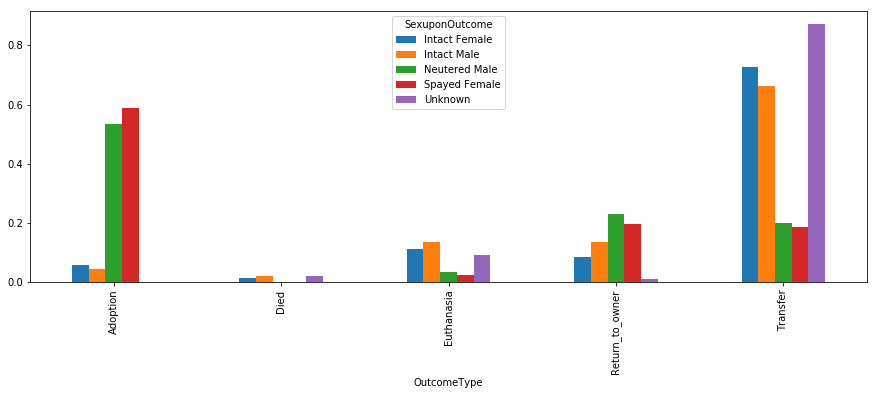

In [25]:
SexuponOutcome_OutcomeType_percent.pivot(index='OutcomeType',columns = 'SexuponOutcome', values='Percent').plot(kind='bar',figsize=(15, 5))

Does the absence of a name affect on OutcomeType

In [26]:
df_data['Nan_name']=pd.isna(df_data['Name'])
df_data.head()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,age,age-range,Nan_name
DateTime,,,,,,,,,,,,
2014-02-12 18:22:00,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0,6 month-1 year,False
2013-10-13 12:44:00,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0,6 month-1 year,False
2015-01-31 12:28:00,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0,more then 1 year,False
2014-07-11 19:09:00,A683430,NaN,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0,1 month,True
2013-11-15 12:52:00,A667013,NaN,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0,more then 1 year,True


In [27]:
Nan_name_OutcomeType_percent = pivot_return_table(df_data,'Nan_name')
print(Nan_name_OutcomeType_percent)

       OutcomeType  Nan_name  Count  Total   Percent
0         Adoption     False   9091  19038  0.477519
1             Died     False     77  19038  0.004045
2       Euthanasia     False    740  19038  0.038870
3  Return_to_owner     False   4633  19038  0.243355
4         Transfer     False   4497  19038  0.236212
5         Adoption      True   1678   7691  0.218177
6             Died      True    120   7691  0.015603
7       Euthanasia      True    815   7691  0.105968
8  Return_to_owner      True    153   7691  0.019893
9         Transfer      True   4925   7691  0.640359


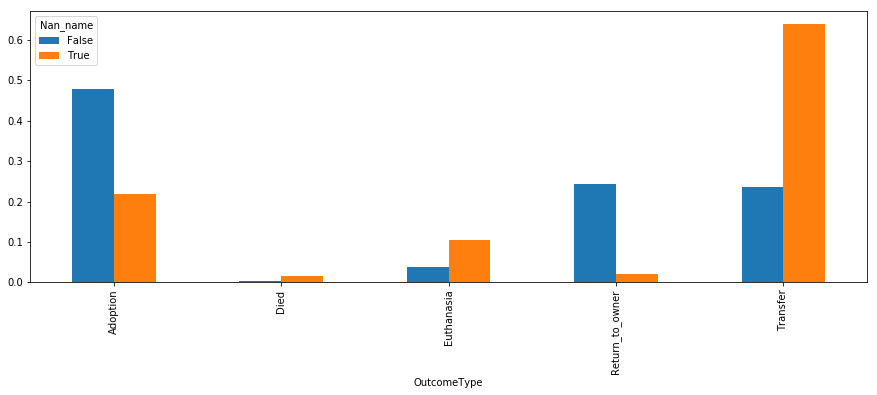

In [28]:
Nan_name_OutcomeType_percent.pivot(index='OutcomeType',columns = 'Nan_name', values='Percent').plot(kind='bar',figsize=(15, 5))

Does the Mix of a color affect on OutcomeType

In [29]:
df_data['Mix_color']=df_data['Color'].str.contains('/')
#df_data.head()

Finding AnimalType distribution by Year Month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """


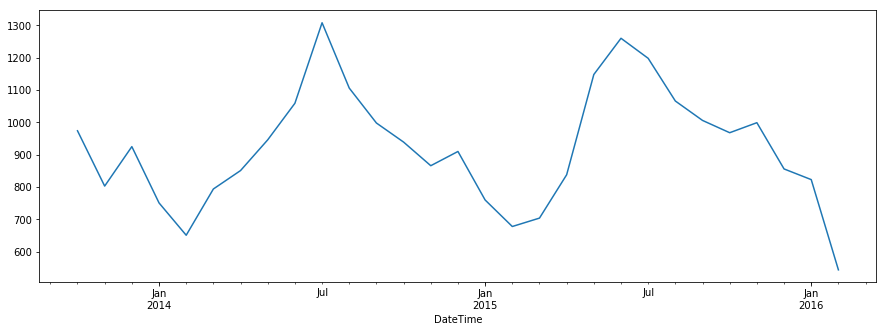

In [30]:
#Color_OutcomeType_percent = pivot_return_table(df_data,'Mix_color')
#print(Color_OutcomeType_percent)


df_data['AnimalType'].resample('M', how = 'count').plot(figsize=(15, 5))


מסקנה - ניתן לראות עונתיות בכמות החיות

In [31]:
df_data.loc[:, 'Year'] = df_data.index.year

In [32]:
df_data.loc[:, 'Month'] = df_data.index.month

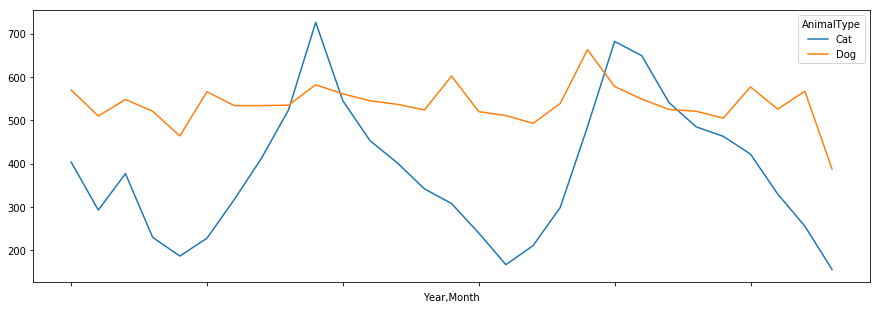

In [33]:
df_data.groupby(['Year','Month','AnimalType'])['AnimalType'].count().unstack().plot(figsize=(15, 5))

מסקנה- אצל חתולים ישנה עונתיות מובהקת כמו כו ניתן לראות שאצל כלבים אין עונתיות

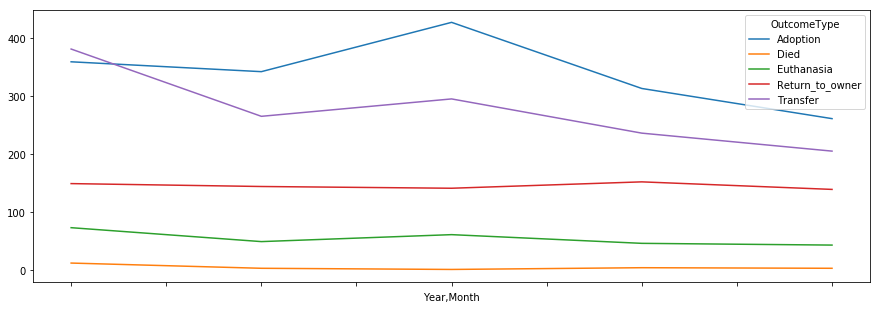

In [34]:
df_data.groupby(['Year','Month','OutcomeType'])['OutcomeType'].count().unstack().head().plot(figsize=(15, 5))

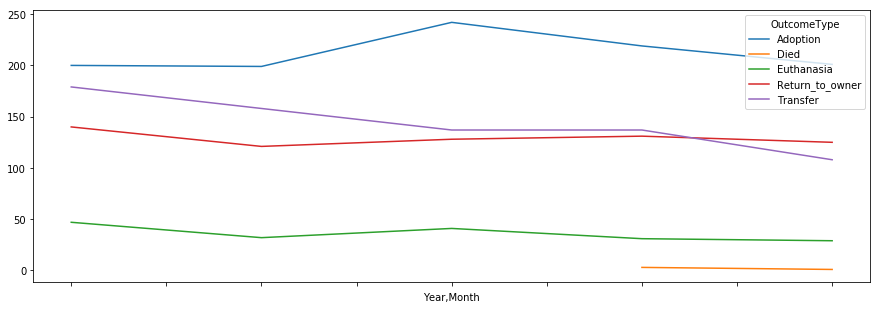

In [35]:
df_data.loc[df_data['AnimalType']=='Dog'].groupby(['Year','Month','OutcomeType'])['OutcomeType'].count().unstack().head().plot(figsize=(15, 5))

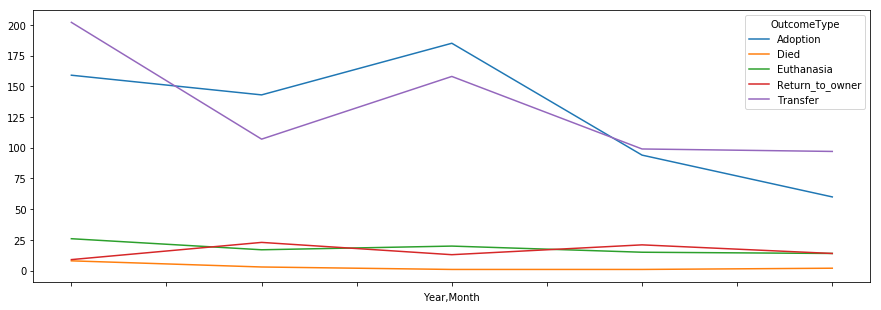

In [36]:
df_data.loc[df_data['AnimalType']=='Cat'].groupby(['Year','Month','OutcomeType'])['OutcomeType'].count().unstack().head().plot(figsize=(15, 5))

מסקנה - אין עונתיות במשתנה מטרה

In [37]:
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'

In [38]:
df_data['Sex']=df_data.SexuponOutcome.apply(get_sex)


In [39]:
df_data.groupby(['OutcomeType','Sex'])['Sex'].count().unstack()

Sex,female,male,unknown
OutcomeType,,,
Adoption,5389.0,5380.0,NaN
Died,74.0,98.0,25.0
Euthanasia,633.0,821.0,101.0
Return_to_owner,2049.0,2724.0,13.0
Transfer,4186.0,4281.0,955.0


In [40]:
Sex_OutcomeType_percent = pivot_return_table(df_data,'Sex')
#print(Sex_OutcomeType_percent)

In [41]:
Sex_OutcomeType_percent.loc[:,['OutcomeType','Sex','Percent']].groupby(['OutcomeType','Sex'])['Percent'].sum().unstack()

Sex,female,male,unknown
OutcomeType,,,
Adoption,0.437029,0.404390,NaN
Died,0.006001,0.007366,0.022852
Euthanasia,0.051334,0.061711,0.092322
Return_to_owner,0.166167,0.204750,0.011883
Transfer,0.339470,0.321783,0.872943


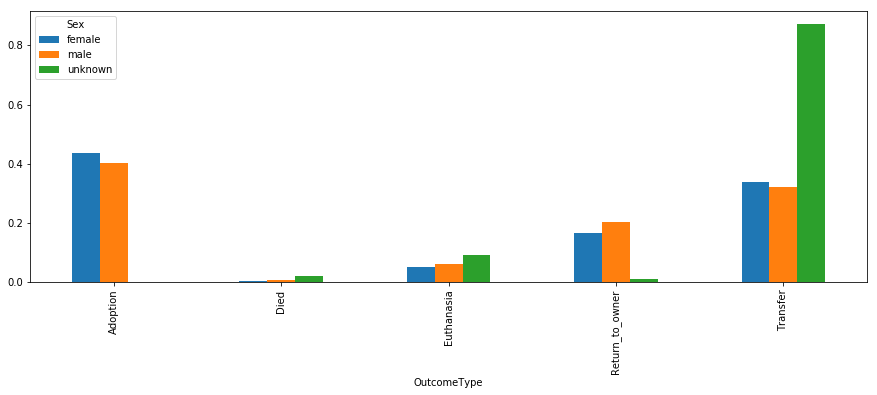

In [42]:
Sex_OutcomeType_percent.loc[:,['OutcomeType','Sex','Percent']].groupby(['OutcomeType','Sex'])['Percent'].sum().unstack().plot(kind='bar',figsize=(15, 5))

מסקנה- אין חשיבות למין החיה

### Constructing model variables:

In [43]:
df_data['have_Name'] = pd.isna(df_data['Name'])

In [44]:
def get_SexuponOutcome(x):
    x = str(x)
    if x.find('Neutered') >= 0: return 'Neutered'
    if x.find('Spayed') >= 0: return 'Spayed'
    if x.find('Intact') >= 0: return 'Intact'
    return 'unknown'

In [45]:
def get_AnimalType(x):
    if x=='Dog': return 1
    return 0

In [46]:
df_data['uponOutcome'] =df_data['SexuponOutcome'].apply(get_SexuponOutcome)

# PART 2

In [72]:

from pandas import read_csv

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC, LinearSVC 
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
df_data.head()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,age,age-range,Nan_name,Mix_color,Year,Month,Sex,have_Name,uponOutcome
DateTime,,,,,,,,,,,,,,,,,,
2014-02-12 18:22:00,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0,6 month-1 year,False,True,2014,2,male,False,Neutered
2013-10-13 12:44:00,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0,6 month-1 year,False,False,2013,10,female,False,Spayed
2015-01-31 12:28:00,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0,more then 1 year,False,True,2015,1,male,False,Neutered
2014-07-11 19:09:00,A683430,NaN,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0,1 month,True,False,2014,7,male,True,Intact
2013-11-15 12:52:00,A667013,NaN,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0,more then 1 year,True,False,2013,11,male,True,Neutered


In [49]:
model_data = df_data.drop(['age','AnimalID','Name','OutcomeSubtype','AgeuponOutcome','Breed','SexuponOutcome','Year','Month'],axis=1)
model_data=model_data.reset_index()
model_data = model_data.drop(['DateTime'],axis=1)

In [50]:
model_data.head()

,OutcomeType,AnimalType,Color,age-range,Nan_name,Mix_color,Sex,have_Name,uponOutcome
0,Return_to_owner,Dog,Brown/White,6 month-1 year,False,True,male,False,Neutered
1,Euthanasia,Cat,Cream Tabby,6 month-1 year,False,False,female,False,Spayed
2,Adoption,Dog,Blue/White,more then 1 year,False,True,male,False,Neutered
3,Transfer,Cat,Blue Cream,1 month,True,False,male,True,Intact
4,Transfer,Dog,Tan,more then 1 year,True,False,male,True,Neutered


In [51]:
model_data['AnimalType_1']= model_data['AnimalType'].apply(get_AnimalType) 
    

In [52]:
model_data=pd.get_dummies(model_data, columns=['Color','age-range','Mix_color','Sex','have_Name','uponOutcome'])
model_data.head()

,OutcomeType,AnimalType,Nan_name,AnimalType_1,Color_Agouti,Color_Agouti/Brown Tabby,Color_Apricot,Color_Apricot/Brown,Color_Apricot/White,Color_Black,Color_Black Brindle,Color_Black Brindle/Black,Color_Black Brindle/Brown,Color_Black Brindle/Brown Brindle,Color_Black Brindle/White,Color_Black Smoke,Color_Black Smoke/Brown Tabby,Color_Black Smoke/White,Color_Black Tabby,Color_Black Tabby/Orange,Color_Black Tabby/White,Color_Black Tiger/White,Color_Black/Black,Color_Black/Black Brindle,Color_Black/Black Smoke,Color_Black/Black Tabby,Color_Black/Blue,Color_Black/Blue Merle,Color_Black/Blue Tick,Color_Black/Brown,Color_Black/Brown Brindle,Color_Black/Brown Merle,Color_Black/Buff,Color_Black/Chocolate,Color_Black/Cream,Color_Black/Gray,Color_Black/Orange,Color_Black/Red,Color_Black/Silver,Color_Black/Silver Tabby,...,Color_White/Gold,Color_White/Gray,Color_White/Gray Tabby,Color_White/Liver,Color_White/Lynx Point,Color_White/Orange,Color_White/Orange Tabby,Color_White/Pink,Color_White/Red,Color_White/Red Merle,Color_White/Red Tick,Color_White/Silver,Color_White/Tan,Color_White/Tricolor,Color_White/White,Color_White/Yellow,Color_White/Yellow Brindle,Color_Yellow,Color_Yellow Brindle,Color_Yellow Brindle/Blue,Color_Yellow Brindle/Tan,Color_Yellow Brindle/White,Color_Yellow/Black,Color_Yellow/White,Color_Yellow/Yellow,age-range_1 month,age-range_6 month-1 year,age-range_month - 6 month,age-range_more then 1 year,Mix_color_False,Mix_color_True,Sex_female,Sex_male,Sex_unknown,have_Name_False,have_Name_True,uponOutcome_Intact,uponOutcome_Neutered,uponOutcome_Spayed,uponOutcome_unknown
0,Return_to_owner,Dog,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0
1,Euthanasia,Cat,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
2,Adoption,Dog,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
3,Transfer,Cat,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
4,Transfer,Dog,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0


In [53]:
#divide data into selected input (x), and expected outputs (y)
x = model_data.drop(['OutcomeType','AnimalType'],axis=1)
y = model_data['OutcomeType']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)


## 6 different classifiers

In [54]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf5 = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
clf2 = DecisionTreeClassifier(max_depth=3)
clf3 = SVC(kernel='linear')
clf6 = SVC(kernel='rbf')
clf4 = LogisticRegression()

classifiers = [('KNN', clf1), ('DT', clf2), ('SVM-linear', clf3),('Log',clf4),('KNN-euclidean',clf5), ('SVM-rbf', clf6)]

In [65]:
results = pd.DataFrame(y_train, columns=['OutcomeType'])
#results.head()

In [56]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    results[clf_name] = clf.predict(X_train)
    print("{:3} classifier:\n \
        \ttrain accuracy: {:.2f}\n \
        \ttest accuracy: {:.2f}"\
        .format(clf_name, 
                clf.score(X_train, y_train), 
                clf.score(X_test, y_test)))
    print(classification_report(y_test, clf.predict(X_test)))

KNN classifier:
         	train accuracy: 0.62
         	test accuracy: 0.59
                 precision    recall  f1-score   support

       Adoption       0.60      0.78      0.68      3213
           Died       0.00      0.00      0.00        51
     Euthanasia       0.22      0.13      0.16       480
Return_to_owner       0.40      0.32      0.36      1477
       Transfer       0.69      0.59      0.64      2798

    avg / total       0.57      0.59      0.57      8019

DT  classifier:
         	train accuracy: 0.61
         	test accuracy: 0.60
                 precision    recall  f1-score   support

       Adoption       0.56      0.97      0.71      3213
           Died       0.00      0.00      0.00        51
     Euthanasia       0.00      0.00      0.00       480
Return_to_owner       0.00      0.00      0.00      1477
       Transfer       0.71      0.62      0.66      2798

    avg / total       0.47      0.60      0.51      8019

SVM-linear classifier:
         	train acc

Conclusion - We got the best at LogisticRegression and in SVM-linear
         	test accuracy: 0.62

## KNN as a base model

In [70]:
clf_base = KNeighborsClassifier()

In [73]:
clf_bagging = BaggingClassifier(base_estimator=clf_base,
                                n_estimators=100)
clf_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [ ]:
print("{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}"\
    .format('KNN bagging', 
            clf_bagging.score(X_train, y_train), 
            clf_bagging.score(X_test, y_test)))
print(classification_report(y_test, clf_bagging.predict(X_test)))

Conclusion - We got the best 

## AdaBoost

In [57]:
clf1 = DecisionTreeClassifier(max_depth=3)
classifiers = [ ('DT', clf1)]

In [58]:
for clf_name, clf in classifiers:
    clf_adaboost = AdaBoostClassifier(base_estimator=clf,
                                      n_estimators=200,
                                      learning_rate=0.01)
    clf_adaboost.fit(X_train, y_train)
    print("{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}"\
    .format(clf_name, 
            clf_adaboost.score(X_train, y_train), 
            clf_adaboost.score(X_test, y_test)))
    print(classification_report(y_test, clf_adaboost.predict(X_test)))

DT  classifier:
     	train accuracy: 0.62
     	test accuracy: 0.61
                 precision    recall  f1-score   support

       Adoption       0.57      0.94      0.70      3213
           Died       0.00      0.00      0.00        51
     Euthanasia       0.00      0.00      0.00       480
Return_to_owner       0.46      0.10      0.16      1477
       Transfer       0.73      0.62      0.67      2798

    avg / total       0.56      0.61      0.55      8019



Conclusion - We have received a similar results like the model above, but still the LogisticRegression has a better score 

## Pipeline

In [59]:
steps = [ ('scale', StandardScaler()), ('reduce_dim', PCA(2)), ('clf', KNeighborsClassifier()) ]

In [60]:
pipe = Pipeline(steps)

In [61]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [62]:
train_pred = pipe.predict(X_train)

In [63]:
test_pred = pipe.predict(X_test)
accuracy_score(test_pred, y_test)

0.5809951365506921

Conclusion - We have received a lower results then the Voting

## Cross validation

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)


for n in range (1,10):
    steps = [('scale', StandardScaler()), ('reduce_dim', PCA(n)), ('clf', KNeighborsClassifier())]
    pipe = Pipeline(steps)    
    
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    
    print(f'{n} components')
    print(f'mean: {scores.mean()}')
    print(f'std: {scores.std()}\n')

1 components
mean: 0.5686274958068902
std: 0.006209806872356201

2 components
mean: 0.5779794699341105
std: 0.006559666059439285

3 components
mean: 0.5920368127722248
std: 0.009357333473621826

4 components
mean: 0.5897382030825533
std: 0.006852678831317991

5 components
mean: 0.5935867003346645
std: 0.007074953909476144

6 components
mean: 0.5940653258022862
std: 0.008734511256090758

7 components
mean: 0.5893088249279497
std: 0.008678607535189673

8 components
mean: 0.5929991790277261
std: 0.006812323858923861

9 components
mean: 0.5878161269996008
std: 0.009734556037383213



Conclusion - We have received on 6 components the best result and the lower Std